<a href="https://colab.research.google.com/github/Moskvicheva/MLDM/blob/main/LinearRegression_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name: Polina Moskvicheva, мИИПИ20-2022

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Task 1 (3 points)

Consider the following toy dataset:

(300, 1)

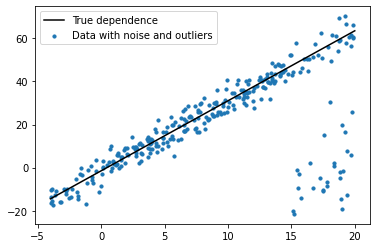

In [ ]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 300)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

X.shape

In [ ]:
# w = np.zeros(dtype=float, shape=X.shape[1]) #initialize w's
# X = np.column_stack((X, np.ones(X.shape[0]))) # add column for bias

# print(X.shape, w.shape, y.shape)

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

In [ ]:
N = X.shape[0]
X = np.column_stack((X, np.ones(N))) # add column for bias

(300, 2) (2,) (300,)


100%|██████████| 1000/1000 [00:00<00:00, 19211.99it/s]


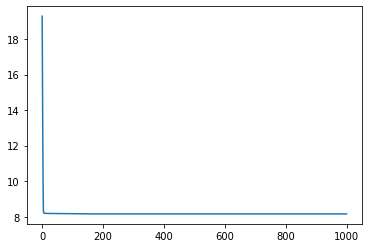

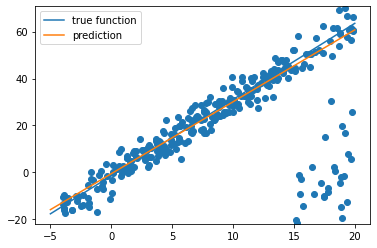

In [ ]:
from tqdm import trange, tqdm
import math

w = np.zeros(dtype=float, shape=X.shape[1]) #initialize w's

loss_values = [] # a list to keep track of how the loss value changes
learning_rate = 0.1


print(X.shape, w.shape, y.shape)

# Training loop
for _ in trange(1000):
  # Your turn: calculate the gradient of MAE with respect to w:
  # df/dw = -x_i * sign(y_i-w*x_i-b)
  # df/db = -sign(y_i-w*x_i-b)
  gradient_piece = np.sign(X.dot(w) - y)
  gradient = np.sum(X * gradient_piece.reshape(N,1) / N, axis=0)

 # Gradient descent step
  w -= learning_rate * gradient 
  
  # Calculate and record the new loss value
  loss_values.append(
      (np.abs(X @ w - y)).mean()
  )

  # Plotting the evolution of loss values
plt.plot(loss_values);
plt.show()

  # Plotting the solution
x = np.linspace(-5, 20, 300)

x_expanded = np.concatenate([
    x[:,None],
    np.ones(shape=(len(x), 1))
    ], axis=1)
plt.plot(x, true_function(x), label='true function')
plt.scatter(X[:,0], y);
plt.plot(x,
         x_expanded @ w, label='prediction')
plt.ylim(y.min() - 0.5, y.max() + 0.5)
plt.legend();

[2.34616723] 0.6633233573937538


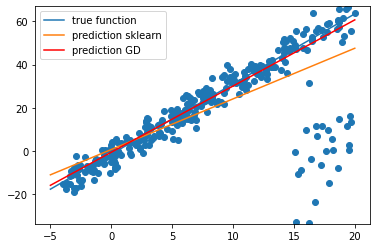

In [ ]:
from sklearn.linear_model import LinearRegression

X, y = generate_dataset()
model = LinearRegression().fit(X, y)
print(model.coef_, model.intercept_)

x = np.linspace(-5, 20, 300)

x_expanded = np.concatenate([
    x[:,None],
    np.ones(shape=(len(x), 1))
    ], axis=1)
plt.plot(x, true_function(x), label='true function')
plt.scatter(X[:,0], y);
plt.plot(x,
         model.predict(x[:, None]), label='prediction sklearn')
plt.plot(x,
         x_expanded @ w, label='prediction GD', c='r')
plt.ylim(y.min() - 0.5, y.max() + 0.5)
plt.legend();

#### $\color{green}{\text{ Conclusion: Here we can see that prediction using gradient descent method is more precise than built-in sklearn one}}$

## Task 2 (2 + 1 points)

TODO

* Wrap your solution from the previous task into a class. Plot the learning curve and the final fit. Compare and comment your results with the previos ones. **(2 points)**

* Make it possible to choose a loss function. **(1 point)**

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin

In [ ]:
class LinearRergessionSGD(BaseEstimator, RegressorMixin):
    def __init__(self):
        raise NotImplementedError

    def fit(self, x, y):
        raise NotImplementedError

    def predict(self, x):
        raise NotImplementedError
    
    def fit_predict(self, x, y):
        raise NotImplementedError

In [ ]:
<YOUR CODE>